In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
def drawData(c1=None, c2=None):
    for i in range(len(c1)):
        plt.plot(c1[i][1], c1[i][2], 'bo')

    for i in range(len(c2)):
        plt.plot(c2[i][1], c2[i][2], 'rx')


def drawLine(w=None, col=None):
    x = np.arange(-10, 10 + 0.1, 10)
    # y = -w[0][0] / w[0][2] - w[0][1] / w[0][2] * x
    y = -w[0] / w[2] - w[1] / w[2] * x
    plt.plot(x, y, col)


def drawDataHyperplane(x_c1=None, x_c2=None, w=None, col=None):
    drawData(x_c1, x_c2)
    drawLine(w, col)
    # plt.show()

In [3]:
def Perceptron_mis_yx(y, x, w, n_epoch, eta):
    n_sample = y.shape[0] // 2
    x_c1 = x[0: n_sample]
    x_c2 = x[n_sample:-1]

    yx = np.multiply(np.tile(y, (1, 3)), x)  # yx
    plt.figure()
    plt.title('After')
    plt.xlim(- 5, 10)
    plt.ylim(- 5, 10)

    print('----- Perceptron_mis_yx() started -----\n')
    for e in range(1, n_epoch + 1):
        err = 0
        yx_misclassified = np.zeros(yx[0].shape)
        for i, _ in enumerate(yx):
            wyx = np.dot(w, yx[i])

            if wyx < 0:
                yx_misclassified = yx_misclassified + yx[i]
                err += 1
        w = w + yx_misclassified
        print(f'err = {err}')
        drawDataHyperplane(x_c1, x_c2, w, 'k')

        if err == 0:
            break

    plt.show()
    
    ret1 = e
    return ret1

In [7]:
def Perceptron_l2(Y, X, w, epoch, eta):
    n_sample = Y.shape[0] // 2
    x_c1 = X[0: n_sample - 1]
    x_c2 = X[n_sample:-1]

    # draw svm
    plt.figure()
    plt.title('After2')
    plt.xlim(- 5, 10)
    plt.ylim(- 5, 10)

    print('----- Perceptron_l2() started -----')
    for e in range(1, epoch + 1):
        err1 = 0
        err2 = 0
        for i, _ in enumerate(X):
            wx = np.dot(w, X[i])
            diff = np.multiply(np.tile((Y[i] - wx), (1, 3)), X[i])  
            err1 +=  err1 + 1 / 2*((Y[i] - wx)**2)
            if np.multiply(Y[i], wx) < 0:
                err2 += 1
            w = w + (eta * diff).squeeze()
        print(f'err {e} = {err1} {err2}')
        drawDataHyperplane(x_c1, x_c2, w, 'k')
        if err2 == 0:
            break

    plt.show()
    ret1 = e
    return ret1

In [8]:
def perceptron1():
    n_sample = 20

    x_c1 = pd.read_csv('x_c1.csv', header=None)
    x_c2 = pd.read_csv('x_c2.csv', header=None)

    # shape (20, 3)
    x_c1 = np.hstack((np.ones((n_sample, 1)), x_c1.to_numpy()))
    x_c2 = np.hstack((np.ones((n_sample, 1)), x_c2.to_numpy()))

    # shape (20, 1)
    y1 = np.ones((n_sample, 1)) * -1
    y2 = np.ones((n_sample, 1))

    # shape (40, 3)
    X = np.vstack((x_c1, x_c2))

    # shape (40, 1)
    Y = np.vstack((y1, y2))
    
    # shape (1, 3)
    # w = np.random.rand(1, 3)  # [b, w1, w2]
    w = np.random.rand(len(X[0]))

    # draw initial line
    plt.figure()
    plt.title('Before')
    plt.xlim(- 5, 10)
    plt.ylim(- 5, 10)
    drawDataHyperplane(x_c1, x_c2, w, 'k')
    plt.show() 
        
    # how many iterations to train for
    n_epoch = 300
    # learning rate
    eta = 0.001
    ret1 = Perceptron_mis_yx(Y, X, w, n_epoch, eta)
    
     # how many iterations to train for
    n_epoch = 300
    # learning rate
    eta = 0.001
    ret2 = Perceptron_l2(Y, X, w, n_epoch, eta)
   

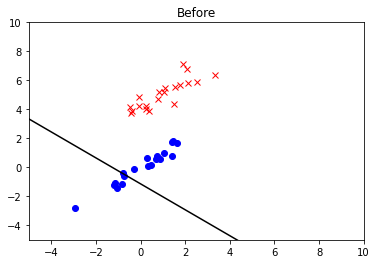

----- Perceptron_mis_yx() started -----

err = 14
err = 25
err = 12
err = 11
err = 10
err = 9
err = 3
err = 2
err = 1
err = 0


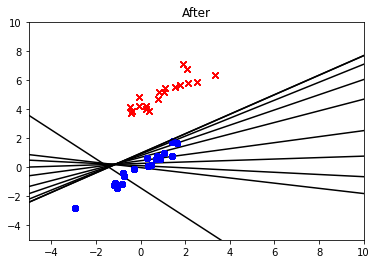

----- Perceptron_l2() started -----
err 1 = [7.3212458e+12] 14
err 2 = [4.61271499e+12] 15
err 3 = [3.39538395e+12] 16
err 4 = [2.78940891e+12] 19
err 5 = [2.45639668e+12] 19
err 6 = [2.25385387e+12] 19
err 7 = [2.11696298e+12] 19
err 8 = [2.01451485e+12] 19
err 9 = [1.93090147e+12] 19
err 10 = [1.85812362e+12] 19
err 11 = [1.79201159e+12] 19
err 12 = [1.73035981e+12] 19
err 13 = [1.67198158e+12] 19
err 14 = [1.61622237e+12] 19
err 15 = [1.56270711e+12] 19
err 16 = [1.51120828e+12] 18
err 17 = [1.46157683e+12] 16
err 18 = [1.41370593e+12] 16
err 19 = [1.36751193e+12] 16
err 20 = [1.32292439e+12] 15
err 21 = [1.27988068e+12] 15
err 22 = [1.23832325e+12] 15
err 23 = [1.19819808e+12] 14
err 24 = [1.15945385e+12] 13
err 25 = [1.12204149e+12] 13
err 26 = [1.0859139e+12] 13
err 27 = [1.05102578e+12] 13
err 28 = [1.01733351e+12] 13
err 29 = [9.84795053e+11] 13
err 30 = [9.533699e+11] 12
err 31 = [9.23018992e+11] 12
err 32 = [8.93704669e+11] 12
err 33 = [8.65390617e+11] 12
err 34 = [8.38041819

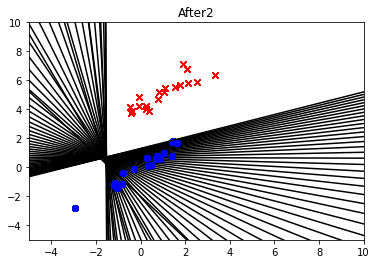

In [9]:
perceptron1()